In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset


In [11]:
numbers = pd.read_csv('all_numbers_variables.csv')

# X = variables.drop(columns=["disconnected_actual", 'OFFICE_TELEPHONE', 'Index', 'connected_actual'])   #Feature Matrix
# y = variables["disconnected_actual"]          #Target Variable
# variables.head()

In [12]:
df=variables.drop(columns=['connected_actual','OFFICE_TELEPHONE', 'Index', 'No Provider', 'No Provider City', 'No Provider State', 'No Line Type'])

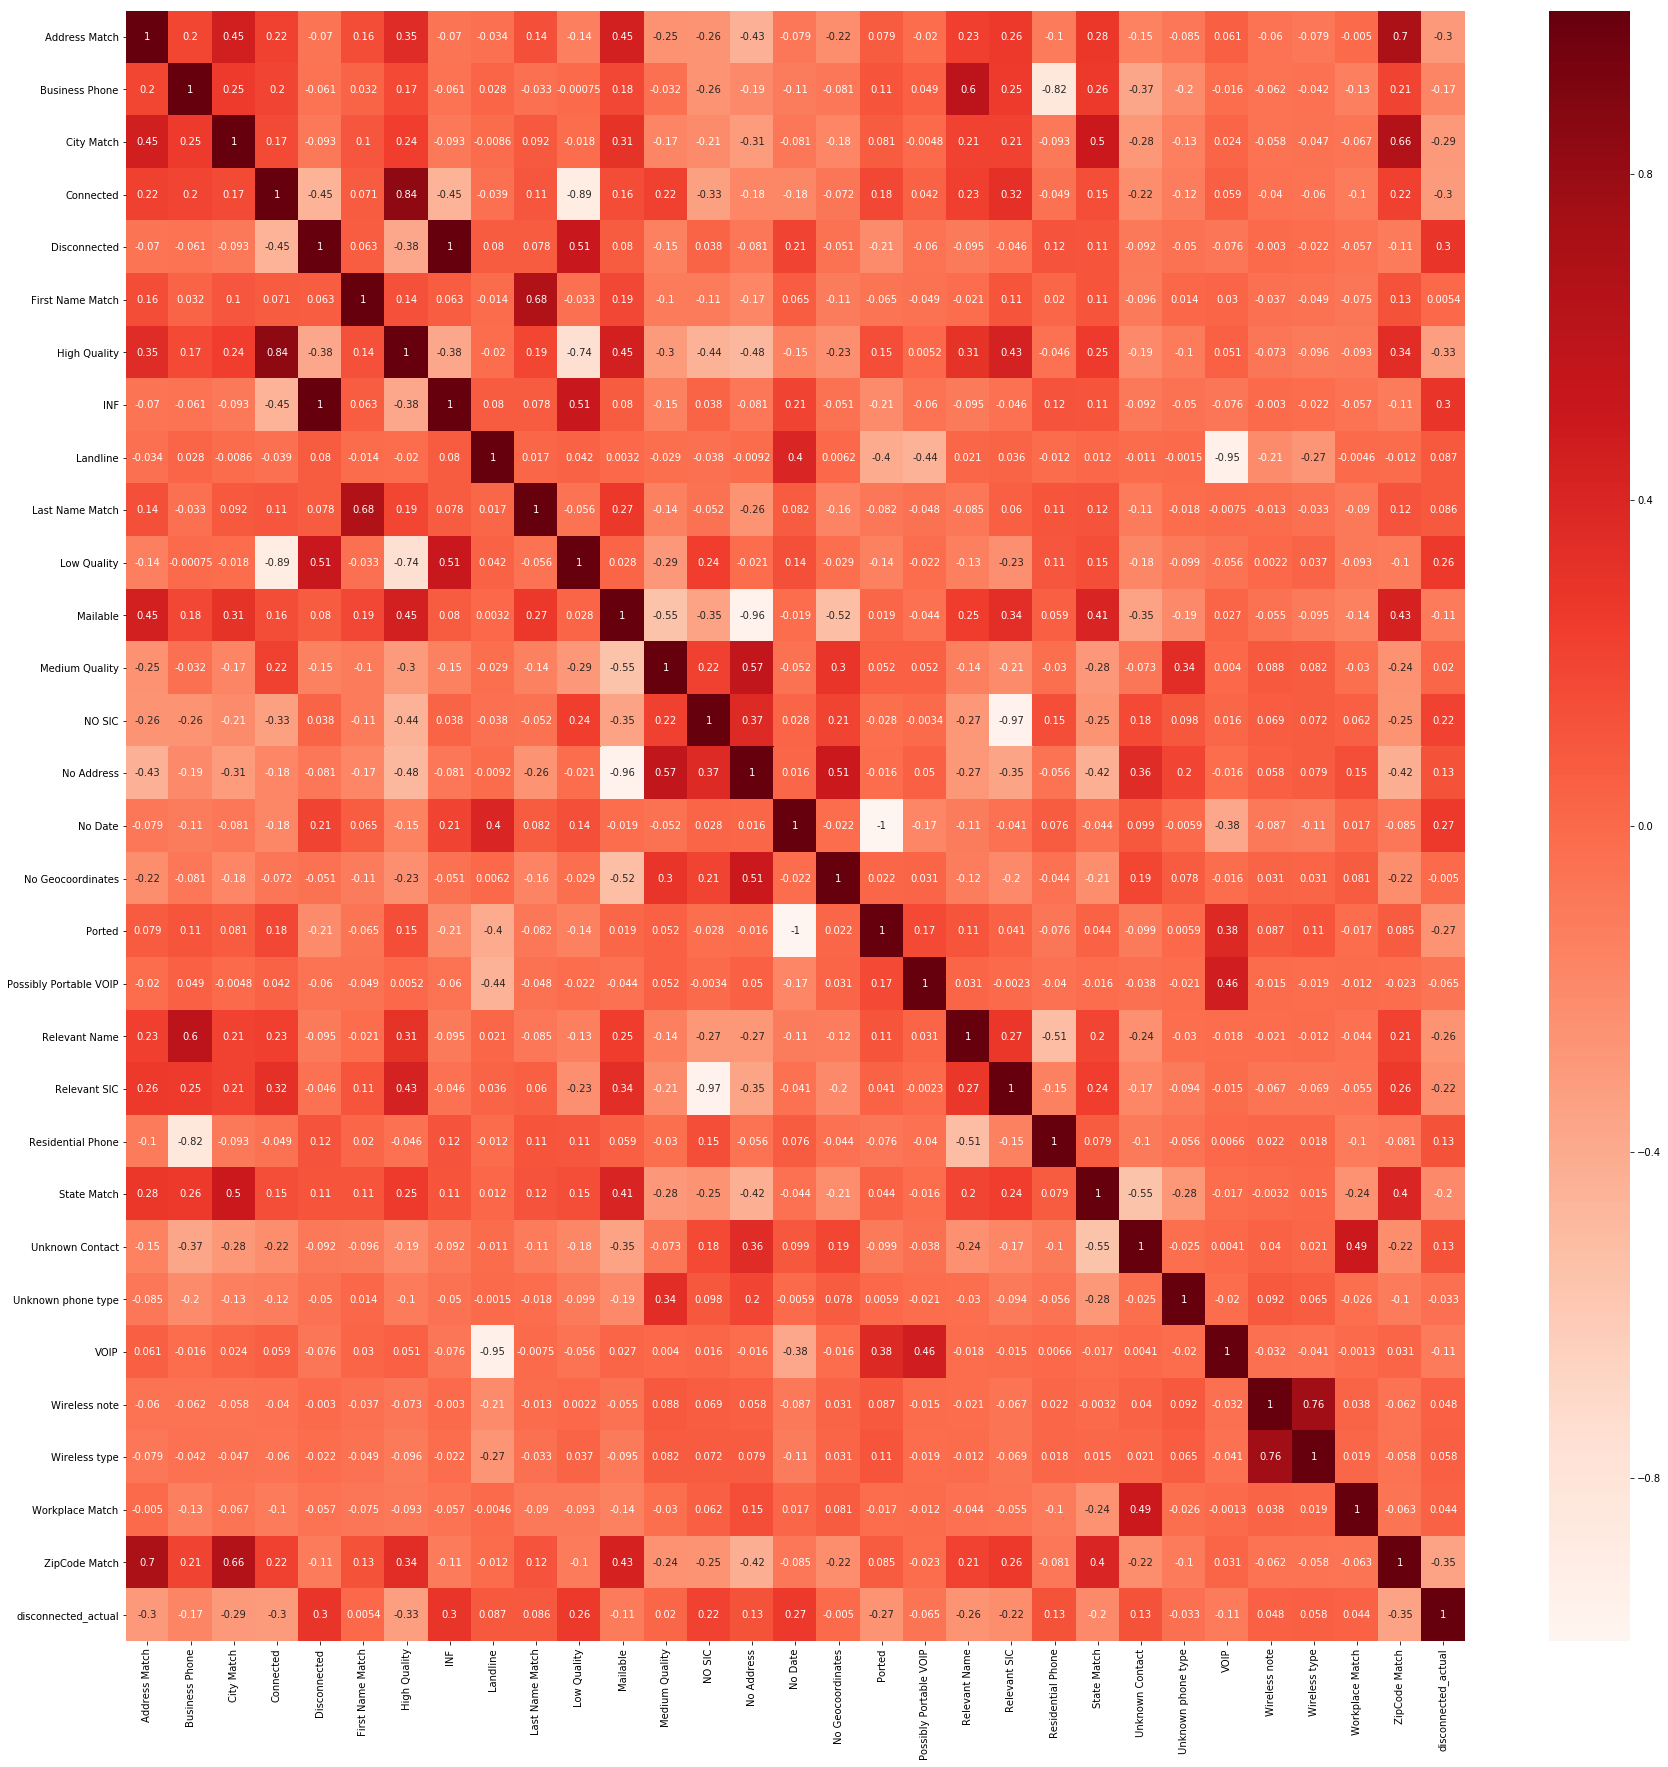

In [16]:
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('correlation_heatmap')
plt.show()


In [20]:
#Correlation with output variable
cor_target = abs(cor["disconnected_actual"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Address Match          0.296239
City Match             0.292935
Connected              0.302830
Disconnected           0.298849
High Quality           0.325541
INF                    0.298849
Low Quality            0.261964
NO SIC                 0.217224
No Date                0.265304
Ported                 0.265304
Relevant Name          0.256269
Relevant SIC           0.224023
State Match            0.202457
ZipCode Match          0.349127
disconnected_actual    1.000000
Name: disconnected_actual, dtype: float64

In [46]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
listy = model.pvalues

C:\Users\vigrose\AppData\Local\Programs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Address Match', 'Business Phone', 'Connected', 'Disconnected', 'INF', 'Landline', 'Last Name Match', 'No Geocoordinates', 'Ported', 'Relevant Name', 'Relevant SIC', 'State Match', 'Unknown phone type', 'VOIP', 'ZipCode Match']


In [42]:
#no of features
nof_list=np.arange(1,37)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 30
Score with 30 features: 0.174458


In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[5.912e+01 5.505e+00 2.809e+01 3.965e+01 5.329e+01 5.642e+00 1.317e-02
 5.780e+01 5.329e+01 4.647e-01 3.374e+00 3.110e+01 5.944e+00 1.364e+00
 2.797e+01 1.886e+01 2.554e+01 1.658e-02 6.348e+00 5.642e+00 6.348e+00
 6.348e+00       nan 2.535e+01 4.298e+00 1.775e+01 4.424e+01 6.446e+00
 6.877e+00 7.053e-01 1.764e+01 7.887e-01 8.164e+00 2.115e+00 3.017e+00
 2.195e+00 5.416e+01]
[[0 0 0 0]
 [0 0 0 0]
 [1 1 0 1]
 [0 0 0 0]
 [0 1 0 1]]


In [62]:
features = pd.DataFrame(relevant_features)
features.sort_values(['ConnectedActual'], ascending=False)

,ConnectedActual
ConnectedActual,1.000000
ZipCode Match,0.364791
High Quality,0.349559
Address Match,0.329068
Connected,0.316022
City Match,0.298160
Relevant SIC,0.295968
NO SIC,0.283115
Disconnected,0.272050
INF,0.272050
